# Extra exercise -  the fat operating point

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## The aim of this exercise is to analyze how fat mass and feeding regulats each other
## For that reason, we will model a new endocrine circuit - the leptin circuit:
### Read the following short introduction to the leptin circuit:

* Leptin is secreted by adipocytes (fat cells) in proportion to their fat deposit.
* Leptin is a satiety hormone - it reaches areas in the brain and at act to reduce food seeking behviour.
* Leptin secretion is also sensitive to recent food intake - it rises when we eat, and decreses when we fast

#### 1. Based on the information above, write a simple differential equation for leptin:
* Use only the given symbols
* Name this varible 'dL'

In [2]:
L,F,al,bl,u = symbols('L,F,a_L,\gamma_L,u ',positive= True)
dL_dt       = symbols('dL')/symbols('dt')

In [3]:
dL          = al*F*u - bl*L
display(Eq(dL_dt,dL))

Eq(dL/dt, F*a_L*u - L*\gamma_L)

#### 2. We will model an equation for daily food intake
#### We will assume a hill function: $u = \frac{u_{max}}{1+(L/K_L)^n}$
#### Write an expression for $u$:  
name this varible 'uL'

In [4]:
u,umax,kl,n = symbols('u,u_{max},K_L,n',positive= True)
uL          = umax/(1+(L/kl)**n)

display(Eq(u,uL))

Eq(u, u_{max}/((L/K_L)**n + 1))

#### 3. lastly, we will model a differential equation for fat-mass:
* Fat prodction rises with food intake, $a_F u$

* Fat is removal is due to two processes:
 * Fat itself is energy demanding - fat removal is proportional to fat mass $\gamma_F F$
 * In addition, there is basal energetic cost - a constant removal term $\gamma_E$

#### Write the differntial equation for fat mass:
Name this varible 'dF'

In [5]:
af,bf,be = symbols('a_F,\gamma_F,\gamma_E',positive= True)
dF_dt    = symbols('dF')/symbols('dt')
dF       = af*u   - bf*F - be
display(Eq(dF_dt,dF))

Eq(dF/dt, -F*\gamma_F - \gamma_E + a_F*u)

# 
# 
# 

# Next we will plot the phase portrait of the system
# we will have fat mass, $F$ on the y-axis, and daily food intake $u$ on the x-axis

#### 4. What is the equation that describes fat steady state, if we hold food intake $u$ constant?

In [6]:
display(Eq(F,solve(dF,F)[0]))

Eq(F, (-\gamma_E + a_F*u)/\gamma_F)

This will be the first line to draw over the phase portrait

make a variable to hold this line, call it 'f_line'

In [7]:
f_line = solve(dF,F)[0]

#### 5. What is the equation that describes leptin steady state, if we hold daily food intake $u$ and fat-mass $F$ constant?

In [8]:
display(Eq(L,solve(dL,L)[0]))

Eq(L, F*a_L*u/\gamma_L)

Leptin timescales are much faster then the timescale of fat mass change.

We can assume over a day, fat mass doesn't change. Hence, we can assume that for a given day, leptin concetrations can be calulated from the equation above.

### What is the equation that describes food intake $u$ at a given level of fat-mass $F$?
#### This part is tricky. So follow the exmaple:
First, we will rearange the food intake equation:

In [9]:
display(Eq(u,uL))

Eq(u, u_{max}/((L/K_L)**n + 1))

We ask 'solve' to solve the equation above for L:

We will call this varible 'Lu'

In [10]:
Lu = solve(Eq(u,uL),L)[0]
display(Eq(L,Lu))

Eq(L, (-K_L**n*(u - u_{max})/u)**(1/n))

From question 5, we have another equation for leptin $L$, together they make the equation:

In [11]:
leptin_equality = Eq(solve(dL,L)[0],Lu)
display(leptin_equality)

Eq(F*a_L*u/\gamma_L, (-K_L**n*(u - u_{max})/u)**(1/n))

We can solve this equation for fat mass $F$

In [12]:
solve(leptin_equality,F)[0]

\gamma_L*u**(-1 - 1/n)*(K_L**n*(-u + u_{max}))**(1/n)/a_L

In [13]:
display(Eq(F,solve(leptin_equality,F)[0]))

Eq(F, \gamma_L*u**(-1 - 1/n)*(K_L**n*(-u + u_{max}))**(1/n)/a_L)

This is the second line that we will draw over the phase portrait.

This is pretty ugly expression.

# Now we will turn to experiments in rodents in order estimate the parameters of these lines

In [14]:
import os
from scipy.io import loadmat
from scipy.interpolate import interp1d
import pandas as pd
from scipy.optimize import curve_fit

def_color = [x['color'] for x in plt.cycler("color", plt.cm.Dark2.colors)]
def_color = [def_color[i] for i in [0,1,5,2,3]]

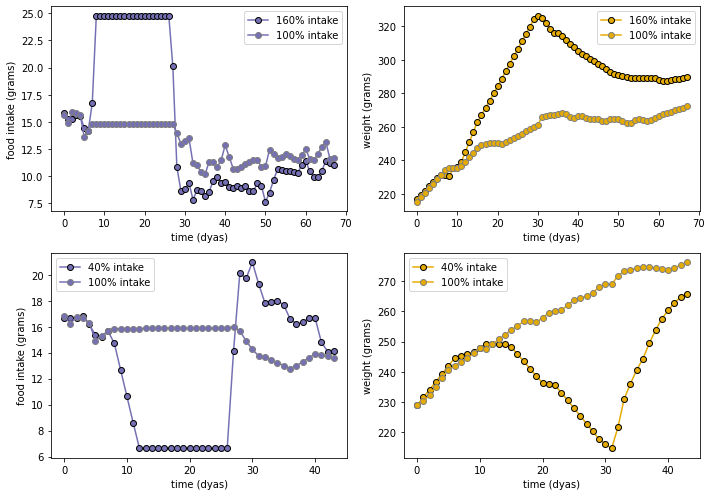

In [15]:
'''
Experiment data of controlled feeding
'''

bw160    = loadmat('../exp_feeding_harris/exp_160/bw160.mat')['Body_weight_160']
bw100    = loadmat('../exp_feeding_harris/exp_160/bw100.mat')['Body_weight_100']
fi160    = loadmat('../exp_feeding_harris/exp_160/fi160.mat')['Food_intake_160']
fi100    = loadmat('../exp_feeding_harris/exp_160/fi100.mat')['Food_intake_100'];fi100[6,1] = fi100[5,1]
bw160_ts            = interp1d(bw160[:,0] - bw160[0,0],bw160[:,1])
bw100_ts            = interp1d(bw100[:,0] - bw100[0,0],bw100[:,1])
fi160_ts            = interp1d(fi160[:,0] - fi160[0,0],fi160[:,1])
fi100_ts            = interp1d(fi100[:,0] - fi100[0,0],fi100[:,1])
ts160               = np.arange(0,68)
df160               = pd.DataFrame(index = ts160)
df160['intake_160'] = fi160_ts(ts160); df160['intake_100'] = fi100_ts(ts160)
df160['weight_160'] = bw160_ts(ts160); df160['weight_100'] = bw100_ts(ts160)
ndf160              = pd.DataFrame(index = ts160)
ndf160['weight']    = df160.weight_160/df160.weight_100
ndf160['intake']    = df160.intake_160/df160.intake_100
ndf160.index        = ndf160.index - ndf160.index[0]
ndf160_             = ndf160.copy().iloc[8:].reset_index()
df_weights_160                = pd.DataFrame(index = [0,4,12,39,'control'])
df_weights_160['total']       = [288,269,254,244,235]
df_weights_160['fat']         = [75,66,50,42,35]
df_weights_160['protein']     = [57,53,51,51,49]
df_weights_160['fat_percent'] = df_weights_160['fat']/df_weights_160['total']

bw40     = loadmat('../exp_feeding_harris/exp_40/bw40.mat') ['Body_weight_40']
bw100    = loadmat('../exp_feeding_harris/exp_40/bw100.mat')['Body_weight_100']
fi40     = loadmat('../exp_feeding_harris/exp_40/fi40.mat') ['Food_intake_40']
fi100    = loadmat('../exp_feeding_harris/exp_40/fi100.mat')['Food_intake_100']
bw40_ts             = interp1d(bw40 [:,0] - bw40 [0,0],bw40 [:,1])
bw100_ts            = interp1d(bw100[:,0] - bw100[0,0],bw100[:,1])
fi40_ts             = interp1d(fi40 [:,0] - fi40 [0,0],fi40 [:,1])
fi100_ts            = interp1d(fi100[:,0] - fi100[0,0],fi100[:,1])
ts40                = np.arange(0,44)
df40                = pd.DataFrame(index = ts40)
df40['intake_40']   = fi40_ts(ts40); df40['intake_100'] = fi100_ts(ts40)
df40['weight_40']   = bw40_ts(ts40); df40['weight_100'] = bw100_ts(ts40)
ndf40               = pd.DataFrame(index = ts40)
ndf40['weight']     = df40.weight_40/df40.weight_100
ndf40['intake']     = df40.intake_40/df40.intake_100
ndf40.index         = ndf40.index - ndf40.index[0]
ndf40_              = ndf40.copy().iloc[12:].reset_index().drop(columns=['index'])
df_weights_40                 = pd.DataFrame(index = [0,2,4,6,8,10,15,'control'])
df_weights_40['total']        = [154,174,180,199,201,211,224,235]
df_weights_40['fat']          = [3.6,10.5,16.5,21,22,25,26.5,35]
df_weights_40['protein']      = [37,39,40,43,44,45,48,49]
df_weights_40['fat_percent']  = df_weights_40['fat']/df_weights_40['total']

plt.figure(figsize=(10,7))
ax1,ax2,ax3,ax4 = plt.subplot(221),plt.subplot(222),plt.subplot(223),plt.subplot(224)

df160['intake_160'].plot(color=def_color[3],marker='o',markeredgecolor='k',ax=ax1)
df160['intake_100'].plot(color=def_color[3],marker='o',markeredgecolor='gray',ax=ax1)
ax1.legend(['160% intake','100% intake']); ax1.set_xlabel('time (dyas)'); ax1.set_ylabel('food intake (grams)')

df160['weight_160'].plot(color=def_color[2],marker='o',markeredgecolor='k',ax=ax2)
df160['weight_100'].plot(color=def_color[2],marker='o',markeredgecolor='gray',ax=ax2)
ax2.legend(['160% intake','100% intake']); ax2.set_xlabel('time (dyas)'); ax2.set_ylabel('weight (grams)')

df40['intake_40'].plot(color=def_color[3],marker='o',markeredgecolor='k',ax=ax3)
df40['intake_100'].plot(color=def_color[3],marker='o',markeredgecolor='gray',ax=ax3)
ax3.legend(['40% intake','100% intake']); ax3.set_xlabel('time (dyas)'); ax3.set_ylabel('food intake (grams)')

df40['weight_40'].plot(color=def_color[2],marker='o',markeredgecolor='k',ax=ax4)
df40['weight_100'].plot(color=def_color[2],marker='o',markeredgecolor='gray',ax=ax4)
ax4.legend(['40% intake','100% intake']); ax4.set_xlabel('time (dyas)'); ax4.set_ylabel('weight (grams)')

plt.tight_layout();plt.show()

# We normalize the experiment curves over the 100% intake control groups

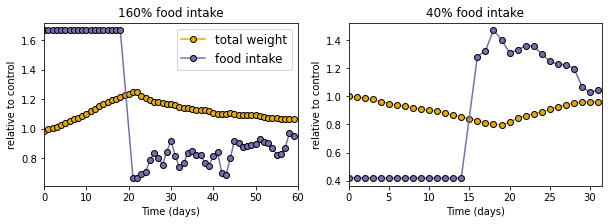

In [16]:
fig  = plt.figure(figsize=(10,3))
ax1  = plt.subplot(121)
ax2  = plt.subplot(122)

# panel A
ax1.plot(list(ndf160_.index),ndf160_.weight,color=def_color[2],marker='o',markeredgecolor='k')
ax1.plot(list(ndf160_.drop(index=[19,20]).index),ndf160_.drop(index=[19,20]).intake,color=def_color[3],marker='o',markeredgecolor='k')
ax1.set_title('160% food intake'); ax1.set_xlabel('Time (days)'); ax1.set_ylabel('relative to control'); ax1.set_xlim([0,60])
ax1.legend(['total weight','food intake'],fontsize=12)

# panel B
ax2.plot(list(ndf40_.index),ndf40_.weight,color=def_color[2],marker='o',markeredgecolor='k')
ax2.plot(list(ndf40_.drop(index=15).index),ndf40_.drop(index=15).intake,color=def_color[3],marker='o',markeredgecolor='k')
ax2.set_title('40% food intake'); ax2.set_xlabel('Time (days)'); ax2.set_ylabel('relative to control') ; ax2.set_xlim([0,31.5])
plt.show()

In [17]:
def scatter_diet_line_by_norm(by='total',ax=[],return_data=False,c=[]):
    
    diet_intake_40  = [df40.iloc[12].intake_40,(df40.iloc[12].intake_100 + df160.iloc[12].intake_100)/2]
    diet_intake_160 = [df160.iloc[12].intake_160,(df40.iloc[12].intake_100 + df160.iloc[12].intake_100)/2]
    diet_weight_40  = [df_weights_40.iloc[0][by],(df_weights_40.iloc[4][by] + df_weights_160.iloc[4][by])/2]
    diet_weight_160 = [df_weights_160.iloc[0][by],(df_weights_40.iloc[4][by] + df_weights_160.iloc[4][by])/2]
    
    x_ = (df40.iloc[12].intake_100 + df160.iloc[12].intake_100)/2
    y_ = (df_weights_40.iloc[4][by] + df_weights_160.iloc[4][by])/2
    
    if not ax:
        ax= plt.subplot(111)
    if not c:
        ax.plot(diet_intake_40/x_,diet_weight_40/y_,'-o',lw=0,c=def_color[0],markeredgecolor='k',markersize=10)
        ax.plot(diet_intake_160/x_,diet_weight_160/y_,'-o',lw=0,c=def_color[1],markeredgecolor='k',markersize=10)
    else:
        ax.plot(diet_intake_40/x_,diet_weight_40/y_,'-o',lw=0,c=c,markeredgecolor='k',markersize=10)
        ax.plot(diet_intake_160/x_,diet_weight_160/y_,'-o',lw=0,c=c,markeredgecolor='k',markersize=10)
        
    if return_data:
        return diet_intake_40/x_,diet_weight_40/y_,diet_intake_160/x_,diet_weight_160/y_
    else:
        return x_,y_

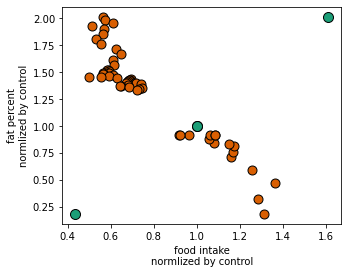

In [18]:
plt.figure(figsize=(5,4))
ax     = plt.subplot(111)
x_,y_  = scatter_diet_line_by_norm(by='fat_percent',ax=ax,c=def_color[0])
intfun = interp1d(df_weights_40.iloc[:-1].fat_percent.index,df_weights_40.iloc[:-1].fat_percent.values)
ax.plot(fi40_ts(28+ np.array(range(16)))/x_,intfun(np.array(range(16))).astype(float)/y_,'o',c=def_color[1],lw=3,markeredgecolor='k',markersize=9)
intfun = interp1d(df_weights_160.iloc[:-1].fat_percent.index,df_weights_160.iloc[:-1].fat_percent.values)
ax.plot(fi160_ts(29+ np.array(range(39)))/x_,intfun(np.array(range(39))).astype(float)/y_,'o',c=def_color[1],lw=3,markeredgecolor='k',markersize=9)
ax.set_xlabel('food intake\nnormlized by control'); ax.set_ylabel('fat percent\nnormlized by control')
plt.show()

C:\Users\alonba\anaconda3\envs\biodata\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\alonba\anaconda3\envs\biodata\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
C:\Users\alonba\anaconda3\envs\biodata\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


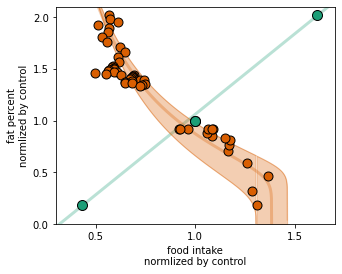

In [19]:
# normalizing data points to plot over the normlaized phase portriat
x_,y_         = scatter_diet_line_by_norm(by='fat_percent',ax=[],c=def_color[0])
app_dat       = np.zeros((11,2))
app_dat[:7,0] = fi40_ts(28+ df_weights_40.iloc[:-1].index.values.astype(int))/x_
app_dat[7:,0] = fi160_ts(29+ df_weights_160.iloc[:-1].index.values.astype(int))/x_
app_dat[:7,1] = df_weights_40.iloc[:-1].fat_percent/y_
app_dat[7:,1] = df_weights_160.iloc[:-1].fat_percent/y_
diet_dat      = scatter_diet_line_by_norm(by='fat_percent',ax=[],c=def_color[0],return_data=True)
diet_dat      = np.array([dat[0] for dat in diet_dat]).reshape((2,2)); plt.close()

# curve fitting the lines to the datapoints
def norm_diet(u,a,b):
    return a*u+b

def norm_appetite(u,A,ks,n):
    return A*(1/u) *(ks/u-1)**(1/n)

diet_pars    , cov = curve_fit(norm_diet, diet_dat[:,0], diet_dat[:,1]) # u0 in range 0-1
appetite_pars, cov = curve_fit(norm_appetite, app_dat[:,0], app_dat[:,1],bounds=(1,np.inf))# umax,n in bounds 1->inf
app_pars_sd        = np.sqrt(np.diag(cov))


plt.figure(figsize=(5,4))
ax = plt.subplot(111)

x_,y_  = scatter_diet_line_by_norm(by='fat_percent',ax=ax,c=def_color[0])
intfun = interp1d(df_weights_40.iloc[:-1].fat_percent.index,df_weights_40.iloc[:-1].fat_percent.values)
ax.plot(fi40_ts(28+ np.array(range(16)))/x_,intfun(np.array(range(16))).astype(float)/y_,'o',c=def_color[1],lw=3,markeredgecolor='k',markersize=9)
intfun = interp1d(df_weights_160.iloc[:-1].fat_percent.index,df_weights_160.iloc[:-1].fat_percent.values)
ax.plot(fi160_ts(29+ np.array(range(39)))/x_,intfun(np.array(range(39))).astype(float)/y_,'o',c=def_color[1],lw=3,markeredgecolor='k',markersize=9)

u_range = np.arange(0.2,2,0.1)
diet_   = [norm_diet(u_,diet_pars[0],diet_pars[1]) for u_ in u_range]
ax.plot(u_range,diet_,c=def_color[0],zorder=-4,ls='-',lw=3,alpha=0.3)

u_range  = np.array([appetite_pars[1] + i*app_pars_sd[1] for i in np.arange(-15,1+0.01,0.01)])
appe_    = [norm_appetite(u_,appetite_pars[0],appetite_pars[1],appetite_pars[2]) for u_ in u_range]
appe_p   = [norm_appetite(u_,appetite_pars[0]+app_pars_sd[0],appetite_pars[1]+app_pars_sd[1],appetite_pars[2]+app_pars_sd[2]) for u_ in u_range]
appe_n   = [norm_appetite(u_,appetite_pars[0]-app_pars_sd[0],appetite_pars[1]-app_pars_sd[1],appetite_pars[2]-app_pars_sd[2]) for u_ in u_range]

ax.plot(u_range,appe_,c=def_color[1],zorder=-4,ls='-',lw=3,alpha=0.3)
ax.plot(u_range,appe_p,c=def_color[1],zorder=-4,ls='-',lw=1,alpha=0.3)
ax.plot(u_range,appe_n,c=def_color[1],zorder=-4,ls='-',lw=1,alpha=0.3)
ax.fill_between(u_range,appe_n,appe_p,color=def_color[1],alpha=0.3)
midx = np.argmin(np.abs((u_range - (appetite_pars[1]-app_pars_sd[1])))) + 5
ax.fill_between(u_range[midx:],appe_p[midx:],color=def_color[1],alpha=0.3)
ax.set_xlabel('food intake\nnormlized by control'); ax.set_ylabel('fat percent\nnormlized by control')
ax.set_ylim([0,2.1]); ax.set_xlim([0.3,1.7]); ax.set_xticks([0.5,1,1.5]); ax.set_yticks([0,0.5,1,1.5,2])
plt.show()

We find estimation for $n$

In [20]:
display(Eq(n,int(appetite_pars[2])))

Eq(n, 7)

This suggests a very steep relation between Leptin and Food intake

## $u = \frac{u_{max}}{1+(L/K_L)^7}$

#### We can use this fact to simplify our model!!
We previously had this food intake line:

In [21]:
u_line = solve(leptin_equality,F)[0]
display(Eq(F,u_line))

Eq(F, \gamma_L*u**(-1 - 1/n)*(K_L**n*(-u + u_{max}))**(1/n)/a_L)

We will use the approximation that $n->\inf$. 

This is valid because $n=7$ is very high for hill function, and almost identical to hill function with $n->\inf$

In sympy, we can have get this approximation by using '.limit()'

In [22]:
u_line_ninf = u_line.limit(n,oo)

display(Eq(F,u_line_ninf))

Eq(F, K_L*\gamma_L/(a_L*u))

There is actually another limit to this line. Beacuse if $u = u_{max}, F = 0 $

# The phase portrait of the simplified system is: 

In [23]:
def get_numeric_nullclines_func(subs):
    app_ninf          = (bl*kl/(al*u))
    Fc                = float(app_ninf.subs(u,umax).subs(subs))
    diet_line_exp     = solve(dF,u)[0]
    appetite_line_exp = solve(app_ninf - F,u)[0]
    fstst_exp         = solve(Eq(diet_line_exp,appetite_line_exp),F)[0]
    ustst_exp         = diet_line_exp.subs(F,fstst_exp).simplify()
    stst              = [ustst_exp.subs(subs),fstst_exp.subs(subs)]
    null1             = lambdify(F,solve(dF,u)[0].subs(subs))
    null2_semi        = lambdify(F,solve(app_ninf - F,u)[0].subs(subs))

    def null2(F): 
        res = []
        for f in F:
            if f>Fc:
                res.append(null2_semi(f))
            else:
                 res.append(float(subs[umax]))
        return np.array(res)
    return null1,null2,stst

def fmt_ax(ax,subs):
    ax.set_ylim([0,float(solve(dF,F)[0].subs(subs).subs(u,subs[umax]))]); 
    ax.set_xlim([0,subs[umax]*1.1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('Fat, $F$',fontsize=20)
    ax.set_xlabel('Food intake, ${u}$',fontsize=20) 
    
aps_k     = dict(arrowstyle="<-",color='k'         ,shrinkA=5,shrinkB=10,connectionstyle="arc3,rad=0."  ,lw=3)


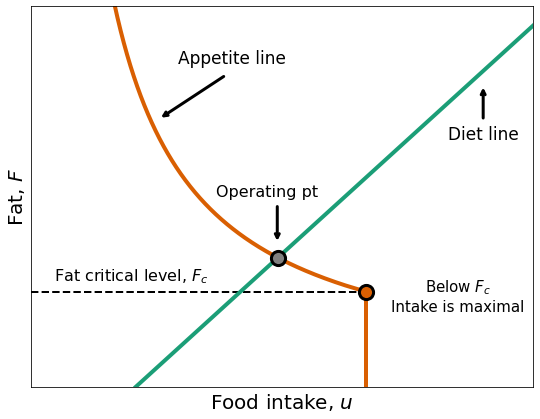

In [24]:
plt.figure(figsize=(9,7))
ax = plt.subplot(111)

subs    = {af:0.01,bf:0.025,al:1,bl:1,be:0.00625,kl:0.5,umax:2}
f_range = np.linspace(0,2*float(solve(dF,F)[0].subs(subs).subs(u,subs[umax])),num=1000)

null1,null2,stst = get_numeric_nullclines_func(subs)
fc = ((kl*bl)/(al*umax)).subs(subs)

ax.plot(null1(f_range),f_range,color=def_color[0],lw=4)
ax.plot(null2(f_range),f_range,color=def_color[1],lw=4)
ax.scatter(stst[0],stst[1],s=200,color='gray',zorder=4,edgecolor='k',lw=3)
ax.scatter(subs[umax],fc,color=def_color[1],zorder=5,s=200,edgecolor='k',lw=3)
ax.plot([0,subs[umax]],[fc,fc],lw=2,ls='--',color='k',zorder=-5)
fmt_ax(ax,subs); ax.set_ylim([0,1]);ax.set_xlim([0,3])

ax.annotate(xy = [0.47,0.5],xycoords='axes fraction',text='Operating pt',fontsize=16,ha='center')
ax.annotate(xy = [0.49,0.5],xytext=[0.49,0.37],xycoords='axes fraction',text='',arrowprops=aps_k,zorder=4)

ax.annotate(xy = [0.2,0.28],xycoords='axes fraction',text='Fat critical level, $F_c$',fontsize=16,ha='center')
ax.annotate(xy = [0.85,0.2],xycoords='axes fraction',text='Below $F_c$\nIntake is maximal',fontsize=15,ha='center')
ax.annotate(xy = [0.9,0.65],xycoords='axes fraction',text='Diet line'    ,fontsize=17,ha='center')
ax.annotate(xy = [0.4,0.85],xycoords='axes fraction',text='Appetite line',fontsize=17,ha='center')
ax.annotate(xy = [0.4,0.83],xytext=[0.25,0.7],xycoords='axes fraction',text='',arrowprops=aps_k,zorder=4)
ax.annotate(xy = [0.9,0.68],xytext=[0.9,0.8],xycoords='axes fraction',text='',arrowprops=aps_k,zorder=4)
plt.show()